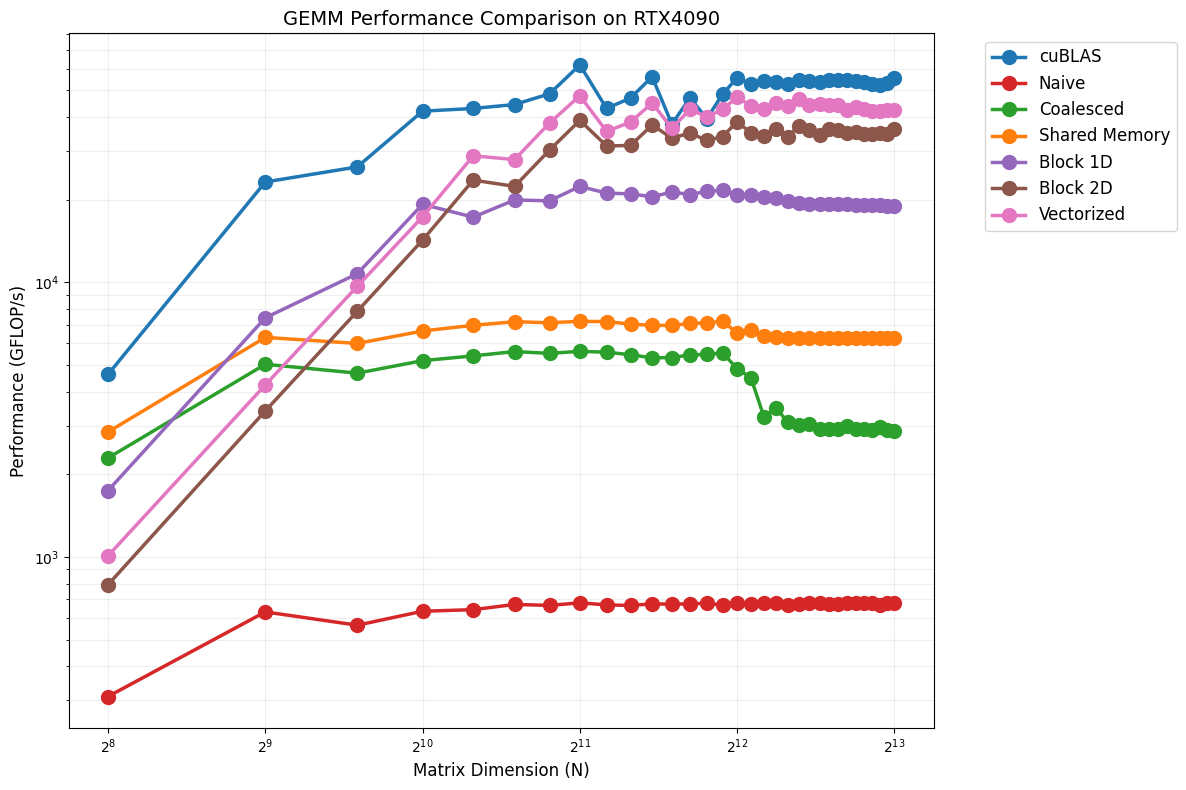

Plot has been saved as 'matrix_multiplication_performance.png'


In [23]:
import re
import matplotlib.pyplot as plt
import numpy as np

def parse_performance_data(text):
    # Initialize data structures
    dimensions = []
    performances = {
        'cuBLAS': [], 'Naive': [], 'Coalesced': [], 
        'Shared Memory': [], 'Block 1D': [], 'Block 2D': [], 
        'Vectorized': []
    }
    
    # Pattern to match dimension line
    dim_pattern = r"Matrix dimensions: M=(\d+)"
    
    # Patterns to match performance lines
    perf_patterns = {
        'cuBLAS': r"cuBLAS implementation: [\d.]+ ms \(([\d.]+) GFLOP/s\)",
        'Naive': r"Naive implementation: [\d.]+ ms \(([\d.]+) GFLOP/s\)",
        'Coalesced': r"Coalesced implementation: [\d.]+ ms \(([\d.]+) GFLOP/s\)",
        'Shared Memory': r"Shared memory implementation: [\d.]+ ms \(([\d.]+) GFLOP/s\)",
        'Block 1D': r"Block tiling 1D implementation: [\d.]+ ms \(([\d.]+) GFLOP/s\)",
        'Block 2D': r"Block tiling 2D implementation: [\d.]+ ms \(([\d.]+) GFLOP/s\)",
        'Vectorized': r"Vectorized implementation: [\d.]+ ms \(([\d.]+) GFLOP/s\)"
    }
    
    # Split text into blocks for each matrix size
    blocks = text.split("Matrix dimensions:")
    
    for block in blocks[1:]:  # Skip first empty block
        # Get dimension
        dim_match = re.search(dim_pattern, "Matrix dimensions:" + block)
        if dim_match:
            dimensions.append(int(dim_match.group(1)))
            
            # Get performance values
            for impl, pattern in perf_patterns.items():
                match = re.search(pattern, block)
                if match:
                    performances[impl].append(float(match.group(1)))
                else:
                    performances[impl].append(np.nan)
    
    return dimensions, performances

def create_plot(dimensions, performances):
    plt.figure(figsize=(12, 8))
    
    # Colors for different implementations
    colors = {
        'cuBLAS': '#1f77b4',
        'Naive': '#d62728',
        'Coalesced': '#2ca02c',
        'Shared Memory': '#ff7f0e',
        'Block 1D': '#9467bd',
        'Block 2D': '#8c564b',
        'Vectorized': '#e377c2'
    }
    
    # Plot each implementation
    for impl, perf in performances.items():
        plt.plot(dimensions, perf, marker='o', label=impl, color=colors[impl], linewidth=2.5, markersize=10)

    # Plot only cuBLAS and Shared memory
    # plt.plot(dimensions, performances['cuBLAS'], marker='o', label='cuBLAS', color=colors['cuBLAS'], linewidth=2.5, markersize=10)
    # plt.plot(dimensions, performances['Shared Memory'], marker='o', label='Shared Memory', color=colors['Shared Memory'], linewidth=2.5, markersize=10)
    # plt.plot(dimensions, performances['Naive'], marker='o', label='Naive', color=colors['Naive'], linewidth=2.5, markersize=10)
    
    plt.xscale('log', base=2)
    plt.yscale('log', base=10)
    plt.grid(True, which="both", ls="-", alpha=0.2)
    
    plt.xlabel('Matrix Dimension (N)', fontsize=12)
    plt.ylabel('Performance (GFLOP/s)', fontsize=12)
    plt.title('GEMM Performance Comparison on RTX4090', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    
    plt.tight_layout()
    return plt

# Example usage assuming the text is in a file named 'performance_data.txt'
performances = {}
def main():
    try:
        with open('performance_data.txt', 'r') as file:
            text = file.read()
            
        global performances
        dimensions, performances = parse_performance_data(text)
        plt = create_plot(dimensions, performances)
        plt.savefig('matrix_multiplication_performance.png', dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
        
        print("Plot has been saved as 'matrix_multiplication_performance.png'")
    except FileNotFoundError:
        print("Error: performance_data.txt not found")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()

In [18]:
performances['Naive'][-1]

681.94

In [19]:
performances['Shared Memory'][-1]

6278.78

In [24]:
performances['Block 1D'][-1]

18944.8

In [25]:
performances['cuBLAS'][-1]

55547.66

In [26]:
performances['Block 2D'][-1]

36239.58